In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Configurando figuras de seaborn
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
%qtconsole

In [4]:
synergy_file = "synergy_logistics_database.csv"
sldb = pd.read_csv(synergy_file, parse_dates = [5])

In [5]:
sldb

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,2015-01-02,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,2015-03-02,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,2015-04-02,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,2020-06-30,Gas turbines,Sea,Union Energy Co,13000000


In [6]:
sldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   register_id     19056 non-null  int64         
 1   direction       19056 non-null  object        
 2   origin          19056 non-null  object        
 3   destination     19056 non-null  object        
 4   year            19056 non-null  int64         
 5   date            19056 non-null  datetime64[ns]
 6   product         19056 non-null  object        
 7   transport_mode  19056 non-null  object        
 8   company_name    19056 non-null  object        
 9   total_value     19056 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.5+ MB


<h3>PROBLEMA 1</h3>
<p><b>Rutas con mayor flujo de importación y exportación</b></p> 

In [7]:
allRoutes = sldb.groupby(['origin','destination'])['register_id'].count()
routes_demand = allRoutes.sort_values(ascending = False)
routes_demand = routes_demand.to_frame().rename(columns={'register_id':'counter'})

<AxesSubplot:xlabel='origin', ylabel='counter'>

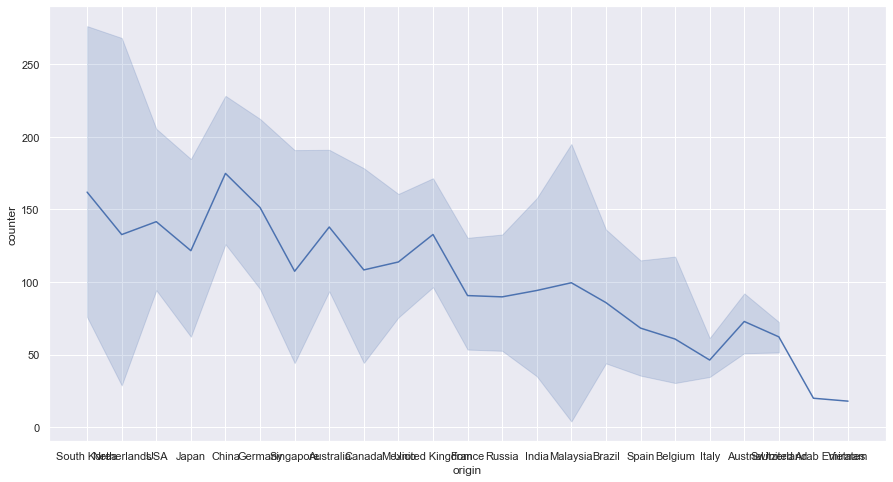

In [8]:
sns.lineplot(data=routes_demand, x='origin',y='counter')

In [9]:
# Las 10 rutas mas demandadas
routes_demand.head(10)

counter
origin      destination         
South Korea Vietnam          497
Netherlands Belgium          437
USA         Netherlands      436
Japan       Mexico           385
China       Mexico           351
            Japan            343
Germany     China            328
Japan       Brazil           306
Germany     France           299
South Korea Japan            294

<h3> PROBLEMA 2 </h3>
<p>Medios de transporte con mayor relevancia</p>

In [10]:
# Se muestran los valores unicos de la columna transport_mode
sldb['transport_mode'].unique()

array(['Sea', 'Air', 'Rail', 'Road'], dtype=object)

In [11]:
# Se agrupa por medios de transporte y se suma el total generado por cada medio 
valTransport = sldb.groupby(['transport_mode'])['total_value'].sum().sort_values(ascending = False)
valTransport

transport_mode
Sea     100530622000
Rail     43628043000
Air      38262147000
Road     33270486000
Name: total_value, dtype: int64

<AxesSubplot:xlabel='transport_mode', ylabel='count'>

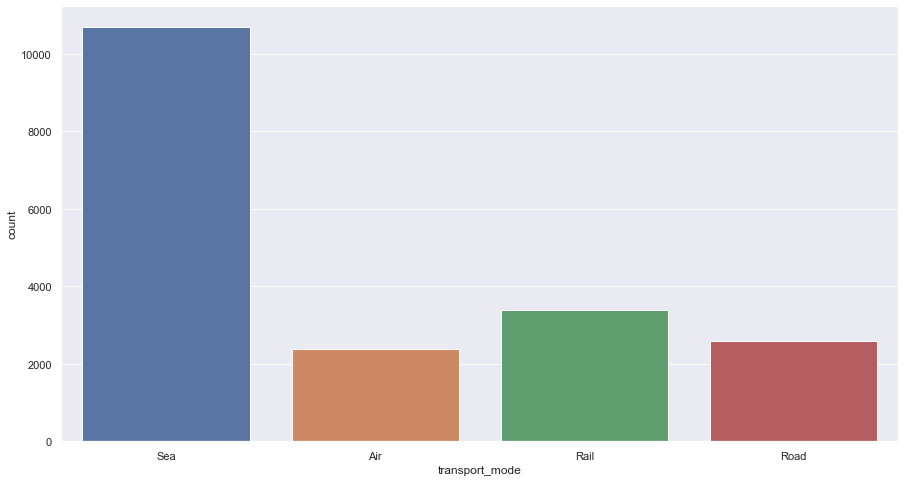

In [12]:
sns.countplot(data = sldb,x = 'transport_mode')

<h3>Problema 3</h3>
<p><b>Valor total de importaciones y expotaciones</b></p>

In [13]:
exports = sldb[sldb['direction'] == 'Exports']
imports = sldb[sldb['direction'] == 'Imports']

In [14]:
# Obtiene el valor total de exportaciones por cada ruta y ordena de mayor a menor
routesExp = exports.groupby(['origin','destination'])['total_value'].sum()
routesExp = routesExp.sort_values(ascending=False)
# Obtiene el valor total de importaciones por cada ruta y ordena de mayor a menor
routesImp = imports.groupby(['origin','destination'])['total_value'].sum()
routesImp = routesImp.sort_values(ascending=False)

In [15]:
# Mostramos las 10 rutas de exportaciones con mayor ingreso total
routesExp.head(10)

origin       destination   
China        Mexico            12250000000
Canada       Mexico             8450000000
South Korea  Vietnam            6877007000
France       Belgium            5538069000
             United Kingdom     5427000000
China        South Korea        4790000000
USA          Mexico             4710000000
South Korea  Japan              4594000000
Germany      Italy              4541000000
China        Germany            4090000000
Name: total_value, dtype: int64

In [16]:
# Mostramos las 10 rutas de importaciones con mayor ingreso total
routesImp.head(10)

origin     destination         
Singapore  Thailand                4017000000
Japan      Mexico                  3918000000
China      Thailand                3831000000
Malaysia   Thailand                3482000000
China      United Arab Emirates    3357000000
           Japan                   3237000000
Mexico     USA                     2365000000
Japan      United Arab Emirates    2238000000
Spain      Germany                 2044000000
Germany    Mexico                  1804000000
Name: total_value, dtype: int64

In [17]:
# Se agrupan todas las rutas
allRoutes = sldb.groupby(['origin','destination'])
# Se obtienen los valores de suma total por ruta y conteo total por ruta
values_routes = allRoutes['total_value'].sum()
# part.head(int(len(part)*0.8)) # Es el 80%
values_counts = allRoutes['register_id'].count()

In [18]:
# Se crea un dataframe para guardar la informacion obtenida
info_routes = pd.DataFrame()
info_routes['suma'] = values_routes
info_routes['conteo'] = values_counts
# Se genera una columna con el porcentaje absoluto para cada renglon
info_routes['suma_perc'] = (info_routes['suma'] / 
                            info_routes['suma'].sum()) * 100

In [19]:
# Se ordenan los valores del porcentaje de cada renglon de mayor a menor
info_routes = info_routes.sort_values(by='suma_perc',ascending=False)
# Se genera una columna con el porcentaje acumulado
info_routes['perc_cumsum'] = info_routes['suma_perc'].cumsum()
print(info_routes)
# Se filtra por las rutas que sumadas aportan un valor de hasta 80 porciento
info_routes_filtered = info_routes[info_routes['perc_cumsum']<=80]
info_routes_filtered = info_routes_filtered.reset_index()

                                suma  conteo  suma_perc  perc_cumsum
origin      destination                                             
China       Mexico       12494000000     351   5.792538     5.792538
Canada      Mexico        8450000000     261   3.917636     9.710174
South Korea Vietnam       6877007000     497   3.188356    12.898530
China       Japan         5891000000     343   2.731218    15.629748
Japan       Mexico        5829000000     385   2.702473    18.332222
...                              ...     ...        ...          ...
Netherlands Argentina          36000      29   0.000017    99.999968
            Mexico             28000      24   0.000013    99.999981
France      Russia             20000      13   0.000009    99.999990
            Netherlands        14000      20   0.000006    99.999997
            Austria             7000       7   0.000003   100.000000

[172 rows x 4 columns]


In [20]:
countriesMostValued = np.unique( info_routes_filtered[['origin','destination']].values )
pd.Series(countriesMostValued)

0                Argentina
1                  Belgium
2               Belorussia
3                   Brazil
4                   Canada
5                    China
6                   France
7                  Germany
8                    India
9                    Italy
10                   Japan
11                Malaysia
12                  Mexico
13             Netherlands
14                  Russia
15               Singapore
16             South Korea
17                   Spain
18                Thailand
19                  Turkey
20                     USA
21    United Arab Emirates
22          United Kingdom
23                 Vietnam
dtype: object

<AxesSubplot:xlabel='origin', ylabel='suma'>

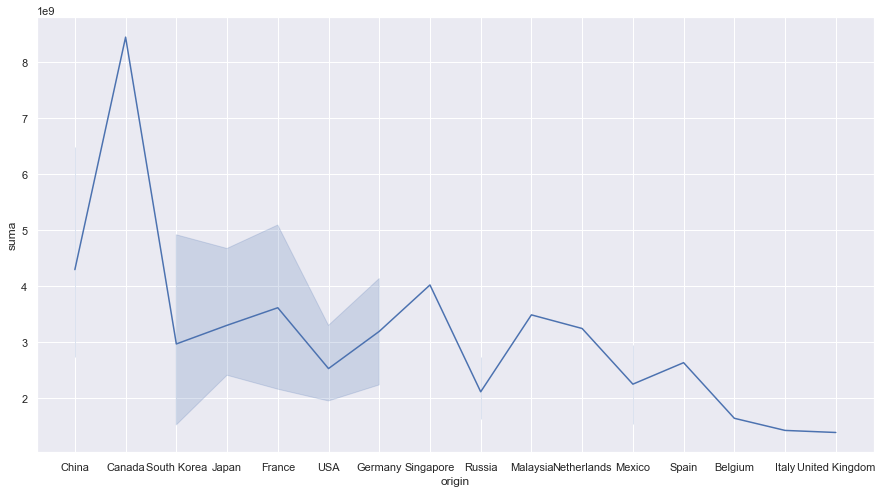

In [21]:
sns.lineplot(data=info_routes_filtered,x='origin',y='suma')